In [1]:
import dual_autodiff as df
import math
import matplotlib.pyplot as plt
import numpy as np

### Q5.
The function of interest is:
\begin{equation}
f(x) = \ln(\sin(x)) + x^2 \cos(x) \tag{1}
\end{equation}

The analytical derivative is:
\begin{equation}
f'(x) = \frac{\cos(x)}{\sin(x)} + 2x \cos(x) - x^2 \sin(x) \tag{2}
\end{equation}

In [2]:
# Using dual number, Compute the differential of Eq. (1) evaluated at x = 1.5

def f_dual(x):
    
    # f(x) = log(sin(x)) + x^2 * cos(x)
    
    return x.sin().log() + (x ** 2)* x.cos()

# Compute f(x) and its derivative at x = 1.5 using Dual Numbers
x = df.Dual(1.5, 1.0)
y = f_dual(x)
df_dual_val = y.dual

print(f"f'(1.5) using Dual Numbers = {df_dual_val}")

f'(1.5) using Dual Numbers = -1.9612372705533612


In [5]:
# Analytical derivative

def f_diff(x):
    # Analytical derivative of f(x), f'(x) = 2x Cos(x) + Cot(x) - x^2 Sin(x)
    return (math.cos(x) / math.sin(x)) + 2 * x * math.cos(x) - (x ** 2) * math.sin(x)

df_analytic_val = f_diff(1.5) # Compute f'(x) at x = 1.5 using analytical derivative
print(f"f'(1.5) using Analytical Derivative = {df_analytic_val}")

f'(1.5) using Analytical Derivative = -1.9612372705533612


To compute the numerical derivative for a general function $f(x)$, the central difference method is often used. For a small step size $h$, the derivative is approximated as:

$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} \tag{3}$$

### Why use central difference?

The central difference method is preferred over forward or backward difference because it provides a higher order of accuracy. Specifically, central difference has a truncation error of $\mathcal{O}(h^2)$, whereas forward and backward difference methods have errors of $\mathcal{O}(h)$. This makes central difference more precise for small step sizes. (??? require reference?)


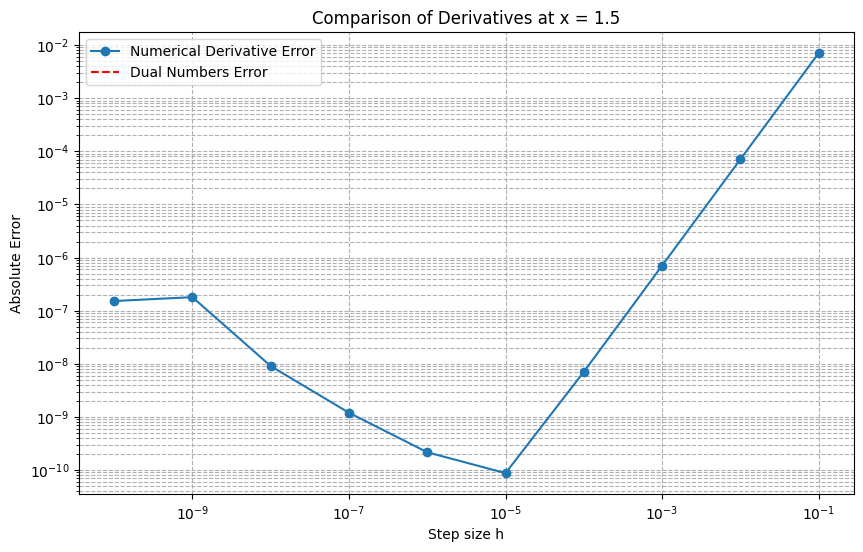

In [6]:
# Compute the numerical differential of f(x) with different step sizes

def numerical_derivative(f, x, h):
    # Numerical derivative using central difference
    return (f(x + h) - f(x - h)) / (2 * h)

def f_python(x):
    # Python version of f(x) for numerical derivative, Eq. (1)
    return math.log(math.sin(x)) + (x ** 2) * math.cos(x)

h_values = np.logspace(-10, -1, 10)  # h from 1e-10 to 1e-1
df_numerical_list = []
for h in h_values:
    derivative = numerical_derivative(f_python, 1.5, h)
    df_numerical_list.append(derivative)
numerical_derivatives = np.array(df_numerical_list)


# Calculate absolute errors
numerical_errors = np.abs(numerical_derivatives - df_analytic_val)
dual_error = abs(df_dual_val - df_analytic_val)

# Plot numerical derivatives vs h
plt.figure(figsize=(10, 6))
plt.loglog(h_values, numerical_errors, 'o-', label='Numerical Derivative Error')
plt.axhline(y=dual_error, color='r', linestyle='--', label='Dual Numbers Error')
# plt.axhline(y=0, color='g', linestyle='-', label='Analytical Derivative')


plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title("Comparison of Derivatives at x = 1.5")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
